# D212: Data Mining II - Task 1
***

### By: Leng Yang
### Student ID: 012298452
### Date: October 6, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Proposal of Question](#A1)
* [A2. Defined Goal](#A2)
* [B1. Explanation of the Clustering Technique](#B1)
* [B2. Summary of the Technique Assumption](#B2)
* [B3. Packages or Libraries List](#B3)
* [C1. Data Preprocessing](#C1)
* [C2. Data Set Variables](#C2)
* [C3. Steps for Analysis](#C3)
* [C4. Cleaned Data Set](#C4)
* [D1. Output and Intermediate Calculations](#D1)
* [D2. Code Execution](#D2)
* [E1. Quality of the Clustering Technique](#E1)
* [E2. Results and Implications](#E2)
* [E3. Limitation](#E3)
* [E4. Course of Action](#E4)
* [F - F1. Panopto Video of Code/Programs](#F)
* [G. Sources for Third-Party Code](#G)
* [H. Sources](#H)

<BR>

<BR>

<BR>

<BR>

## A1. Proposal of Question <a class="anchor" id="A1"></a>

The question for this report is: can a k-means clustering technique be used to identify meaningful patient groups from the medical dataset?

<BR>

## A2. Defined Goal <a class="anchor" id="A2"></a>

This analysis aims to identify meaningful patient groups with similar characteristics. These identified groups would aid the hospital staff in developing better care plans as they would provide some prognostic information on incoming patients. As such, this would also allow for better cost management for the hospital as care plans can be tweaked based on data analysis.

<BR>

## B1. Explanation of the Clustering Technique <a class="anchor" id="B1"></a>

The K-means clustering technique is an unsupervised learning technique that groups similar data points into clusters. The user defines the number of clusters based on several factors, as there is no correctly defined number of clusters. The technique works by, first, initializing 'K' points, or cluster centroids, in an n-dimensional space. Each data point is then categorized according to its closest cluster centroid. Lastly, the location of the cluster centroid is re-located based on the data points assigned to that cluster based on some calculated metric. This process is repeated for several iterations until a stopping point is reached, and the clusters are then completely defined (GeeksforGeeks, 2024).

With the use of the medical data set, it is expected that patients can be meaningfully grouped into distinct clusters. The meaningfulness of the patient groupings can be determined by looking at the quality of the clusters. The quality can be determined by looking at different metrics, such as the silhouette score.

<BR>

## B2. Summary of the Technique Assumption <a class="anchor" id="B2"></a>

One assumption of the technique is that the features are of similar variance. The algorithm creates and calculates clusters based on the distance of the data points, so these data points must be of comparable scale to one another, as those that contain large-scale values can influence how the data points are grouped and how the clusters are formed. Because of this assumption, the data would need to be preprocessed to align all values on a similar scale prior to modeling.

<BR>

## B3. Packages or Libraries List <a class="anchor" id="B3"></a>

Listed are the Python packages and libraries used in assistance for this analysis:
* Pandas: used to load the data into a tabular dataframe and for data manipulation
* NumPy: used for matrix and mathematical calculations
* Matplotlib and Seaborn are both used for visualizations
* Sklearn provides several libraries that aid significantly in this analysis:
    * KMeans is used as the main algorithm for this analysis 
    * StandardScaler is used for preprocessing the data
    * Silhouette score is used as a metric in evaluating the clusters

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [23]:
#Print working versions
from platform import python_version
print("python:", python_version())
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

python: 3.11.9
pandas: 2.2.2
numpy: 1.26.4


<BR>

## C1. Data Preprocessing <a class="anchor" id="C1"></a>

One goal of the data preprocessing step is to standardize the scale of the features. This is necessary as values of a larger scale can strongly influence how clusters are formed, which may negatively affect analysis results. This preprocessing step will be performed using sklearn's `StandardScaler`. This operation will transform the features into a mean of zero and a standard deviation of one.

<BR>

## C2. Data Set Variables <a class="anchor" id="C2"></a>

Listed below are the variables and their respective data types to be used for this analysis.
* Income: Continuous
* Vitamin D levels: Continuous
* Initial Days: Continuous
* Total charges: Continuous
* Additional charges: Continuous

<BR>

## C3. Steps for Analysis <a class="anchor" id="C3"></a>

The data was first loaded into a Pandas data frame, and the column names were reformatted using snake case for consistency. Afterward, the data was inspected to ensure no missing values or outliers needed to be imputed if required for this analysis. Next, only the relevant data is kept, and all others are dropped, as identified in the section above. Afterward, the data statistics were briefly explored.

Once data cleaning and exploration were complete, the data was further processed before modeling. The primary preprocessing step included scaling the features into a standard scale using sklearn's `StandardScaler` class.

In [33]:
df = pd.read_csv('medical_clean.csv', dtype={'Zip':'object'})

In [34]:
# Standardize column names using snake_case and re-express names for comprehensiveness
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude',
             'population', 'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender', 'readmission', 
             'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight',
             'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 
             'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_order          10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   interaction         10000 non-null  object 
 3   uid                 10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  object 
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            10000 non-null  int64  
 15  age                 10000 non-null  int64  
 16  incom

In [36]:
#Select for interested features
model_df = df[['income','vit_d_level','initial_days','total_charge','additional_charges']]

model_df.describe().round(2)

,income,vit_d_level,initial_days,total_charge,additional_charges
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,40490.50,17.96,34.46,5312.17,12934.53
std,28521.15,2.02,26.31,2180.39,6542.60
min,154.08,9.81,1.00,1938.31,3125.70
25%,19598.78,16.63,7.90,3179.37,7986.49
50%,33768.42,17.95,35.84,5213.95,11573.98
75%,54296.40,19.35,61.16,7459.70,15626.49
max,207249.10,26.39,71.98,9180.73,30566.07


In [37]:
#Scale selected features and look at descriptive statistics
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(model_df), columns=model_df.columns)
scaled_df.describe().round(2)

,income,vit_d_level,initial_days,total_charge,additional_charges
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.41,-4.04,-1.27,-1.55,-1.50
25%,-0.73,-0.66,-1.01,-0.98,-0.76
50%,-0.24,-0.01,0.05,-0.05,-0.21
75%,0.48,0.69,1.02,0.98,0.41
max,5.85,4.18,1.43,1.77,2.70


<BR>

## C4. Cleaned Data Set <a class="anchor" id="C4"></a>

Attached to the submission is the cleaned data set, named "D212_Task1_Data.csv."

In [41]:
#Generate csv file of prepared data set
scaled_df.to_csv('D212_Task1_Data.csv', index=False)

<BR>

## D1. Output and Intermediate Calculations <a class="anchor" id="D1"></a>

Two methods were used to determine the optimal number of clusters. The first method involved looking at the inertia value of each model and deciding the number of clusters based on an elbow decision method. The inertia represents the sum of the squared distances of the samples to their closest cluster centers. It represents how well the model clusters the data set, with lower values indicating tighter clusters. The elbow decision method looks at where there is a point where the inertia would begin to decline slowly. From the visualization, the inertia trended downward almost linearly, so no good stopping point was determined, and another method was employed to assist in decision making.

The second method involved looking at the silhouette scores of the models. The silhouette score ranges from -1 to 1, with the latter indicating the best value (Silhouette_score, n.d.). The best silhouette score was one where the model only had two clusters, a score of 0.356. Based on the two visualizations, the optimal number of clusters was two.

In [45]:
#Create empty lists for inertia and silhouette scores
inertia = []
silhouette = []

#Loop through 'k' number of clusters to determine optimal cluster (Kamara, n.d.)
for k in range(2,9):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(scaled_df, model.labels_))

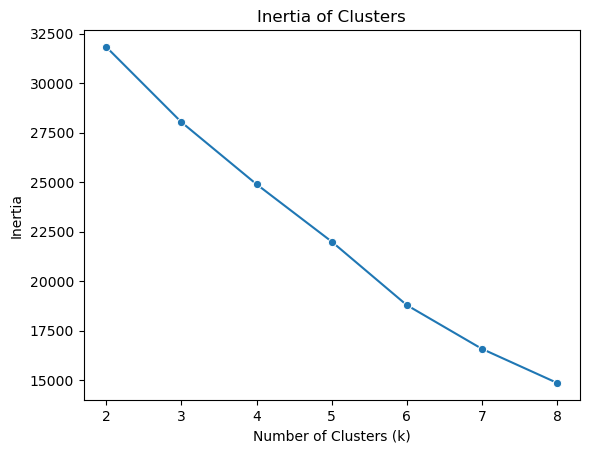

In [46]:
#Move the results into a Series object
inertia_series = pd.Series(inertia, index=range(2,9))

#Visualization of results
sns.lineplot(x=inertia_series.index, y=inertia_series, marker='o')
plt.title('Inertia of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia');

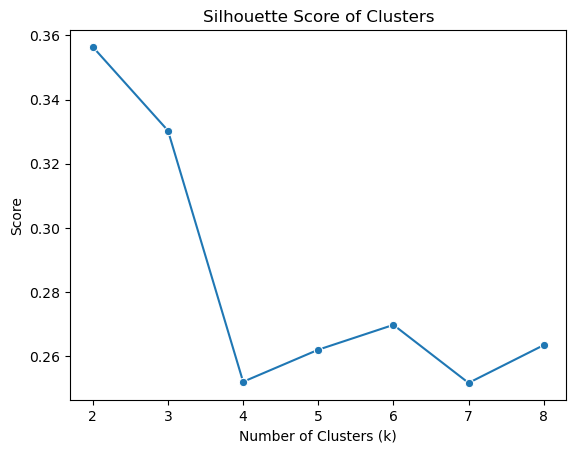

In [47]:
#Move the results into a Series object
silhouette_series = pd.Series(silhouette, index=range(2,9))

#Visualization of results
sns.lineplot(x=silhouette_series.index, y=silhouette_series, marker='o')
plt.title('Silhouette Score of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score');

In [48]:
print('Best silhouette score:', silhouette_series[2])

Best silhouette score: 0.35641538029035336


In [49]:
#Final model with optimal clusters
model = KMeans(n_clusters=2, random_state=42)
model.fit(scaled_df)

#Model cluster centroids
centroid = pd.DataFrame(model.cluster_centers_, columns=scaled_df.columns)
centroid

,income,vit_d_level,initial_days,total_charge,additional_charges
0,0.008639,0.006503,-0.958450,-0.946704,-0.005976
1,-0.008646,-0.006508,0.959217,0.947462,0.005981


<BR>

## D2. Code Execution <a class="anchor" id="D2"></a>

A copy of the code is submitted alongside the report, titled "D212_Task_1_LY.ipynb."

<BR>

## E1. Quality of the Clustering Technique <a class="anchor" id="E1"></a>

As previously stated, the silhouette score is one metric to evaluate the model. Again, the score range goes from -1 to 1, with the latter representing the best score. Negative scores indicate misassigned samples to clusters, near zero, indicate overlapping clusters, and higher positive scores indicate well-defined clusters (Silhouette_score, n.d.).

The silhouette score of the best model was 0.356. While positive, the score is very much closer to zero than to one, indicating that, while there is some distinct clustering, there may be some overlap happening as well. Regarding the clustering technique, the quality of the clusters can be said to be decent but could be better.

<BR>

## E2. Results and Implications <a class="anchor" id="E2"></a>

Based on the analysis results, the best model contained two clusters. Looking at the centroids of the best model produces an interesting finding in that the clusters contain values that are approximately the opposite of each other for every feature. For example, customers in Centroid 0 have a slightly higher income than average and have shorter than average hospital stays on their initial visit, along with lower charges. Patients in Cluster 1 are the opposite, where they lower income than average and have a more extended hospital stay on their initial visit, thus also being charged more.

Although the model does yield some results, they should be taken cautiously as the evaluation metric does not rate the model well. With a silhouette score of 0.356, there are indications of clusters overlapping, producing doubts about the model's reliability. The data could be re-modeled with fewer features or another unsupervised technique employed, as the K-means clustering technique does suffer from higher dimensionality (Sharma, 2024).

<BR>

## E3. Limitation <a class="anchor" id="E3"></a>

One limitation of the analysis is that it is sensitive to outliers and noise. Although the features were scaled and standardized, outliers may persist in the data. Outliers present a limitation as these values can strongly influence how the clusters are formed. One example includes `income`, where values are over five standard deviations from the mean. Additionally, higher dimensional data can present problems as it can generate noise, which opens the opportunity to create clusters that don't necessarily represent the underlying patterns.

<BR>

## E4. Course of Action <a class="anchor" id="E4"></a>

Based on the analysis results, it is recommended that the data be re-modeled, possibly with fewer features, to counteract some of the noise in the data. If all features are to be kept, it is recommended that other unsupervised learning techniques be employed to counteract the dimensionality of the data. Lastly, the results can also be used to gain further insight into the patient population, such as looking at hospital readmissions for each cluster, albeit with some caution on the reliability of the results.

<BR>

## F - F1. Panopto Video of Code/Programs <a class="anchor" id="F"></a>

A recording is submitted alongside the report and can also be found at: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a0774ce7-5588-4eb4-8af3-b201014adb4e

<BR>

## G. Sources for Third-Party Code <a class="anchor" id="G"></a>

Kamara, K. (n.d.). Evaluating and visualizing the model. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9fa8783e-d7d2-4b4d-b06e-b0ee01874bea 

<BR>

## H. Sources <a class="anchor" id="H"></a>

_K means Clustering - Introduction_. GeeksforGeeks. (2024, August 29). https://www.geeksforgeeks.org/k-means-clustering-introduction/ 

Sharma, N. (2024, April 15). _K-Means Clustering Explained_. neptune.ai. https://neptune.ai/blog/k-means-clustering 

_Silhouette_score_. scikit. (n.d.). https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html 